# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:\PROJECTS FOR GITHUB\Machine Learning\diabetes_prediction\diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.describe(),data.info(),data.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(       Pregnancies     Glucose  ...         Age     Outcome
 count   768.000000  768.000000  ...  768.000000  768.000000
 mean      3.845052  120.894531  ...   33.240885    0.348958
 std       3.369578   31.972618  ...   11.760232    0.476951
 min       0.000000    0.000000  ...   21.000000    0.000000
 25%       1.000000   99.000000  ...   24.000000    0.000000
 50%       3.000000  117.000000  ...   29.000000    0.000000
 75%       6.000000  140.250000  ...   41.000000    1.000000
 max      17.000000  199.000000  ...   81.000000    1.000000
 
 [8 rows x 9 columns],
 None,
      Pregnancies  Glucose  ...    Age  Outcome
 0          False    False  ...  False    False
 1          False    False  ...  False    False
 2          False    False  ...  False    False
 3          False    False  ...  False    False
 4          False    False  ...  False    False
 ..           ...      ...  ...    ...      ...
 763        False    False  ...  False    False
 764        False    False  ...  Fa

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
data.duplicated().sum()

np.int64(0)

<Axes: xlabel='Outcome', ylabel='count'>

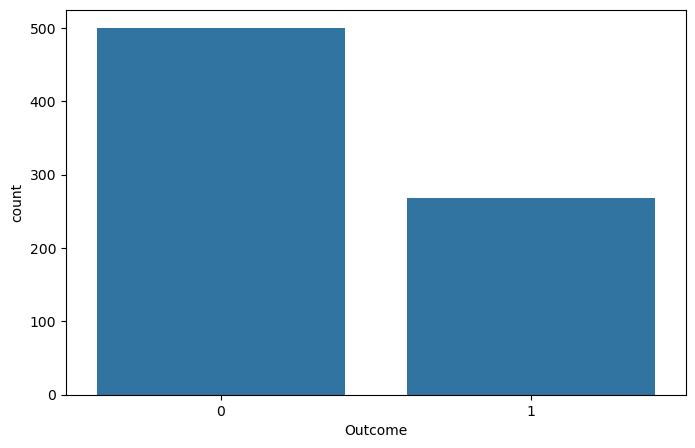

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outcome',data= data)

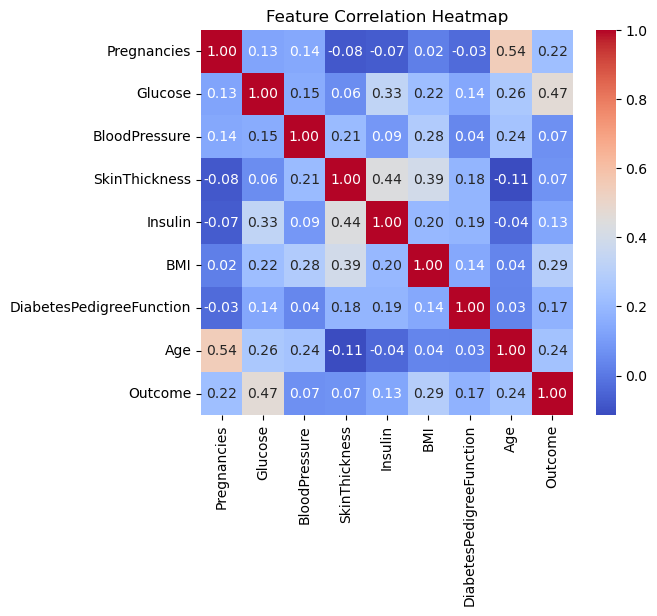

In [10]:
plt.figure(figsize=(6, 5))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# **Standard Scaling And Label Encoding**

In [11]:
from sklearn.preprocessing import StandardScaler


feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Apply StandardScaler
sc_x = StandardScaler()
X = pd.DataFrame(sc_x.fit_transform(data[feature_columns]), columns=feature_columns)

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [13]:
Y=data.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [19]:
max_train_score = max(train_scores)
train_scores_index = [i for i,v in enumerate(train_scores) if v == max_train_score]
print("Max train score {} % and k = {}".format(max_train_score*100,list(map(lambda x: x+1,train_scores_index))))

Max train score 100.0 % and k = [1]


In [20]:
max_test_score = max(test_scores)
test_scores_index = [i for i,v in enumerate(test_scores) if v == max_test_score]
print("Max test score {} % and k = {}".format(max_test_score*100,list(map(lambda x: x+1,test_scores_index))))

Max test score 72.40259740259741 % and k = [7, 9]


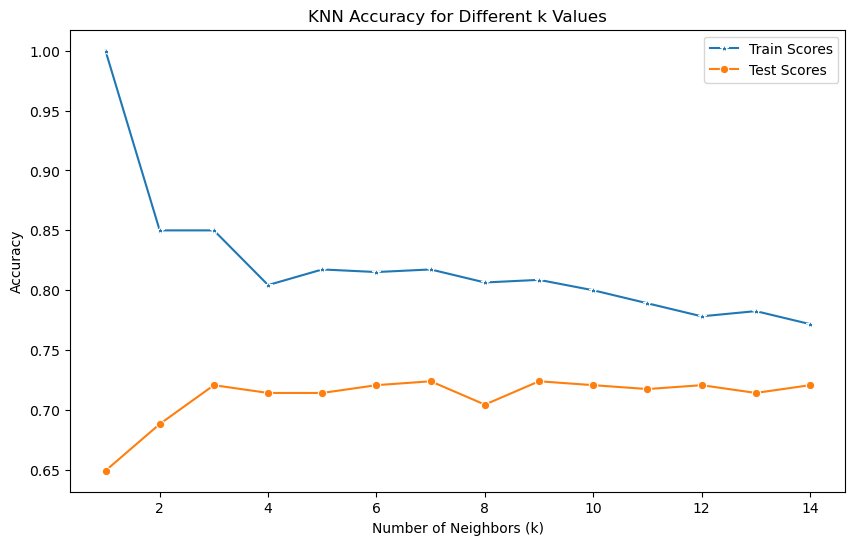

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Lineplot with explicit x and y
sns.lineplot(x=list(range(1,15)), y=train_scores, marker='*', label='Train Scores')
sns.lineplot(x=list(range(1,15)), y=test_scores, marker='o', label='Test Scores')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k Values")
plt.legend()
plt.show()


In [27]:
knn = KNeighborsClassifier(9)
knn.fit(X_train, Y_train)
knn.score(X_test,Y_test)


0.724025974025974

In [26]:
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[163,  43],
       [ 42,  60]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.80      0.79      0.79       206
           1       0.58      0.59      0.59       102

    accuracy                           0.72       308
   macro avg       0.69      0.69      0.69       308
weighted avg       0.72      0.72      0.72       308

